<a href="https://colab.research.google.com/github/kingy0ujin/2024-1-my-BDA/blob/main/inclass/04w_0326_tue_ch06_dataframe_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**빅데이터분석프로그래밍**

- 4주차 QB반

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2
0.13.1


## 코랩에서 한글 처리

In [6]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.9 MB/s eta 0:00:00


In [7]:
%config InlineBackend.figure_format = 'retina'

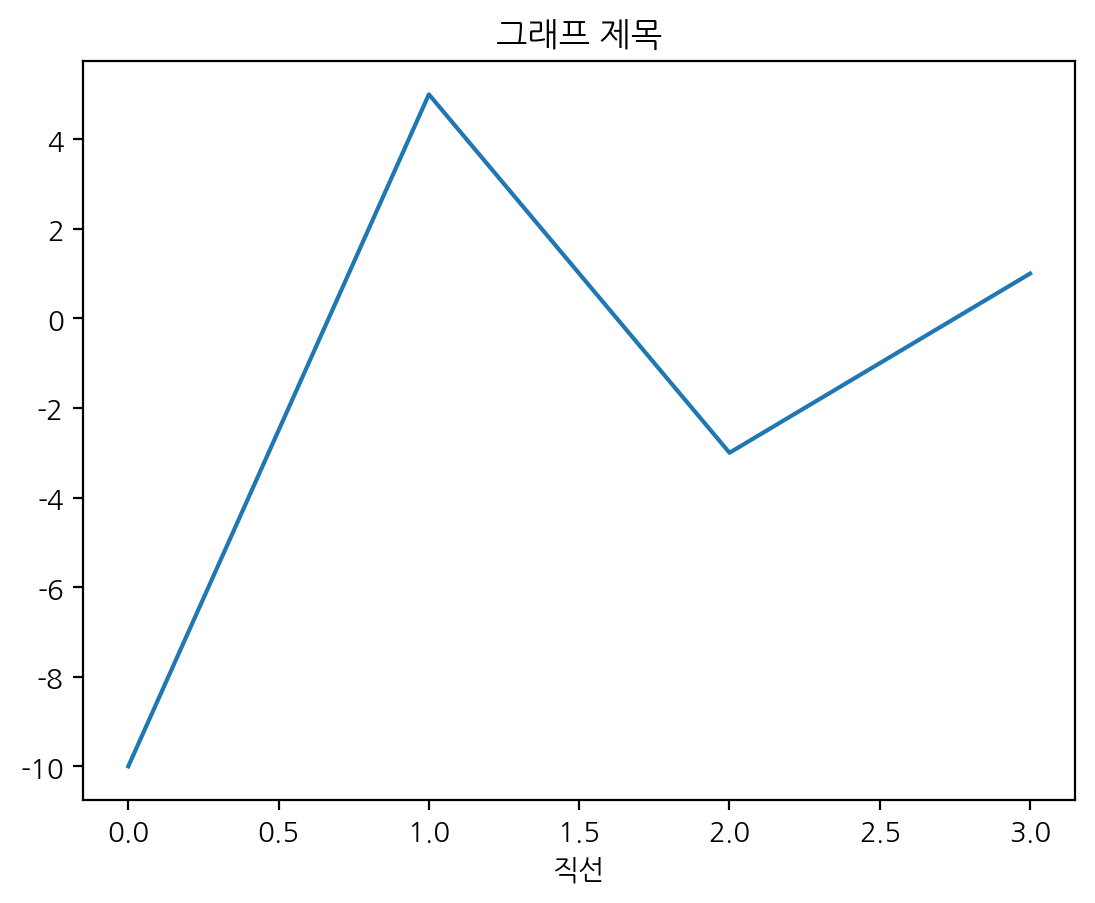

In [8]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

## 수업에서 사용할 데이터를 다음 ㅁ깃에서 복사

### 수업에서 파일 사용시
- 현재 하부 폴더 :  data
- 파일 : data/파일이름

In [9]:
!git clone http://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 7.33 MiB/s, done.


In [10]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [12]:
exam.sample(5)

,id,nclass,math,english,science
6,7,2,80,90,45
15,16,4,58,98,65
8,9,3,20,98,15
17,18,5,80,78,90
10,11,3,65,65,65


In [14]:
exam.query('nclass==1') # 메소드 형식으로 조건을 넣어주기

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [26]:
exam[exam['nclass'] == 1] #시리즈에 있는 true 값만 가져오기

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [15]:
# 2반인 경우만 추출
exam.query('nclass==2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [16]:
#수학 점수가 50점을 초과하는 경우
exam.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [17]:
exam.query('english <= 80')

,id,nclass,math,english,science
4,5,2,25,80,65
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87


In [19]:
# 1반이면서 수학 점수가 50점 이상인 경우
exam.query('nclass==1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [21]:
# 1반이면서 수학 점수가 50점 이상인 경우
exam.query('(nclass==1) & (math >= 50)')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [22]:
# 2반이면서 영어 점수가 80점 이상인 경우
exam.query('nclass==2 & english >= 80')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45


In [23]:
# 수학 점수가 90점 이상이거나 영어 점수가 90점 이상인 경우
exam.query('math >= 90 | english >= 90')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
12,13,4,46,98,65
15,16,4,58,98,65


In [24]:
# 1, 3, 5반에 해당하면 추출
exam.query('nclass == 1 | nclass == 3 | nclass == 5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [25]:
# 1, 3, 5반에 해당하면 추출
exam.query('nclass in [ 1, 3, 5]') # 시험 예상!!!!!!!!!!!!!!

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [34]:
exam[exam['nclass']. isin ([1,3,5])] # is in 메소드를 사용. 소괄호 사용, 인자인 리스트 넣어주기 # 시험 예상!!!!!!!!!!!!!

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [36]:
exam["nclass"]

0     1
1     1
2     1
3     1
4     2
5     2
6     2
7     2
8     3
9     3
10    3
11    3
12    4
13    4
14    4
15    4
16    5
17    5
18    5
19    5
Name: nclass, dtype: int64

In [37]:
type(exam["nclass"]) # 시리즈 : 리스트와 유사하지만 다름, 인덱스(위치)를 바꿀 수 있음

pandas.core.series.Series

In [41]:
exam[["nclass", "math"]] # 데이터프레임 : 열이 1개인 데이터프레임 # 중요!!!!

,nclass,math
0,1,50
1,1,60
2,1,45
3,1,30
4,2,25
5,2,50
6,2,80
7,2,90
8,3,20
9,3,50


In [39]:
type(exam[["nclass"]])

pandas.core.frame.DataFrame

## 추출한 행으로 데이터 만들기

In [42]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam.query('nclass == 1')

# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam.query('nclass == 2')

In [44]:
nclass1 # nclass1에 대한 데이터프레임

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [48]:
nclass1['math'].mean() #시리즈에서 제공하는 함수

46.25

In [49]:
nclass1['math'].sum() #시리즈에서 제공하는 함수

185

In [50]:
nclass1.math.sum()

185

In [53]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam[exam.nclass==1]

# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam[exam.nclass==2]

In [54]:
# 2반 과학 점수 평균 구하기
nclass2.science.mean()

58.25

### 문자 변수를 이용해 조건에 맞는 행 추출하기

In [55]:
df = pd.DataFrame({'sex'     : ['F', 'M', 'F', 'M'],
                   'country' : ['Korea', 'China', 'Japan', 'USA']})
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [56]:
# 전체 조건에 작은따옴표, 추출할 문자에 큰따옴표 사용
df.query('sex == "F" & country == "Korea"')

,sex,country
0,F,Korea


###  (알아 두면 좋아요) 외부 변수를 이용해 추출하기

In [57]:
var = 3
exam.query('nclass == @var') # 변수를 인지하는 방법

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [58]:
exam[exam.nclass == var]

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


| 논리 연산자 | 기능        |
|:-----------:|-------------|
| <           | 작다        |
| <=          | 작거나 같다 |
| >           | 크다        |
| >=          | 크거나 같다 |
| ==          | 같다        |
| !=          | 같지 않다   |
| \|          | 또는        |
| &           | 그리고      |
| in          | 매칭 확인   |


| 산술 연산자 | 기능            |
|:-----------:|-----------------|
| +           | 더하기          |
| -           | 빼기            |
| *           | 곱하기          |
| **          | 제곱            |
| /           | 나누기          |
| //          | 나눗셈의 몫     |
| %           | 나눗셈의 나머지 |

## pandas, seaborn 사이트 참조


메소드 df.isin()

In [60]:
df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]},
                  index=['falcon', 'dog'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [61]:
df.isin([0]) # list나 dict 형태

,num_legs,num_wings
falcon,False,False
dog,False,True


In [62]:
df.isin([0, 2])

,num_legs,num_wings
falcon,True,True
dog,False,True


In [161]:
~df.isin([0, 2])

,num_legs,num_wings
falcon,False,False
dog,True,False


In [160]:
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [159]:
df.isin({'num_wings': [0, 3]})

,num_legs,num_wings
falcon,False,False
dog,False,True


### 데이터프레임끼리 비교하기

In [162]:
other = pd.DataFrame({'num_legs': [8, 3], 'num_wings': [0, 2]},
                     index=['spider', 'falcon'])
other

,num_legs,num_wings
spider,8,0
falcon,3,2


In [164]:
df.isin(other)

,num_legs,num_wings
falcon,False,True
dog,False,False


In [165]:
s = pd.Series(['llama', 'cow', 'llama', 'beetle', 'llama', 'hippo'], name='animal')
s.isin(['cow', 'llama'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: animal, dtype: bool

In [166]:
~s.isin(['cow', 'llama'])

0    False
1    False
2    False
3     True
4    False
5     True
Name: animal, dtype: bool

In [167]:
s.isin(['llama'])

0     True
1    False
2     True
3    False
4     True
5    False
Name: animal, dtype: bool

In [168]:
print(pd.Series([1]).isin(['1']))
print(pd.Series([1.1]).isin(['1.1']))

0    False
dtype: bool
0    False
dtype: bool


In [169]:
print(pd.Series([1]).isin([1]))
print(pd.Series([1.1]).isin([1.1]))

0    True
dtype: bool
0    True
dtype: bool


### 06-3 필요한 변수만 추출하기

In [63]:
exam['math']  # math 추출

0     50
1     60
2     45
3     30
4     25
5     50
6     80
7     90
8     20
9     50
10    65
11    45
12    46
13    48
14    75
15    58
16    65
17    80
18    89
19    78
Name: math, dtype: int64

In [64]:
exam['english']  # english 추출

0     98
1     97
2     86
3     98
4     80
5     89
6     90
7     78
8     98
9     98
10    65
11    85
12    98
13    87
14    56
15    98
16    68
17    78
18    68
19    83
Name: english, dtype: int64

In [65]:
exam.english # 데이터프레임 속성 사용

0     98
1     97
2     86
3     98
4     80
5     89
6     90
7     78
8     98
9     98
10    65
11    85
12    98
13    87
14    56
15    98
16    68
17    78
18    68
19    83
Name: english, dtype: int64

In [66]:
exam.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [69]:
exam.columns[3]

'english'

In [67]:
exam[[exam.columns[3]]]

,english
0,98
1,97
2,86
3,98
4,80
5,89
6,90
7,78
8,98
9,98


In [70]:
exam.columns[1:3]

Index(['nclass', 'math'], dtype='object')

In [72]:
exam[[columns[1:3]]]

NameError: name 'columns' is not defined

In [73]:
exam[['nclass', 'math', 'english']]  # nclass, math, english 추출

,nclass,math,english
0,1,50,98
1,1,60,97
2,1,45,86
3,1,30,98
4,2,25,80
5,2,50,89
6,2,80,90
7,2,90,78
8,3,20,98
9,3,50,98


### 행과 변수(열) 제거하기

In [74]:
exam.sample(3)

,id,nclass,math,english,science
7,8,2,90,78,25
1,2,1,60,97,60
12,13,4,46,98,65


In [76]:
exam.drop(1) # 삭제하라는 데이터프레임의 메소드

,id,nclass,math,english,science
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [78]:
exam.drop(labels=[1, 2], axis=0) # 행 삭제

,id,nclass,math,english,science
0,1,1,50,98,50
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [80]:
exam.drop('nclass', axis=1) # 열 삭제할때는 열 이름을

,id,math,english,science
0,1,50,98,50
1,2,60,97,60
2,3,45,86,78
3,4,30,98,58
4,5,25,80,65
5,6,50,89,98
6,7,80,90,45
7,8,90,78,25
8,9,20,98,15
9,10,50,98,45


In [81]:
exam.drop(labels ='nclass', axis=1) # 열 삭제

,id,math,english,science
0,1,50,98,50
1,2,60,97,60
2,3,45,86,78
3,4,30,98,58
4,5,25,80,65
5,6,50,89,98
6,7,80,90,45
7,8,90,78,25
8,9,20,98,15
9,10,50,98,45


In [82]:
exam.drop(['nclass', 'english'], axis=1) # 여러 열 삭제 -> 리스트 형태로

,id,math,science
0,1,50,50
1,2,60,60
2,3,45,78
3,4,30,58
4,5,25,65
5,6,50,98
6,7,80,45
7,8,90,25
8,9,20,15
9,10,50,45


In [86]:
exam.drop(index=3)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [93]:
exam.drop(index=[3, 5])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
4,5,2,25,80,65
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [89]:
exam.drop(columns="math")

,id,nclass,english,science
0,1,1,98,50
1,2,1,97,60
2,3,1,86,78
3,4,1,98,58
4,5,2,80,65
5,6,2,89,98
6,7,2,90,45
7,8,2,78,25
8,9,3,98,15
9,10,3,98,45


In [90]:
exam.drop(columns=["math", "english"])

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


### pandas 함수 조합하기

In [94]:
# nclass가 1인 행만 추출한 다음 english 추출
exam.query('nclass == 1')['english']

0    98
1    97
2    86
3    98
Name: english, dtype: int64

In [95]:
exam.query('nclass == 1')[['english']]

,english
0,98
1,97
2,86
3,98


In [96]:
# math가 50 이상인 행만 추출한 다음 id, math 추출
exam.query('math >= 50')[['id', 'math']] # 여러개면 무조건 데이터프레임 형태로

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [100]:
exam.query('math >= 50')[['id', 'math']].sample(3) #sample -> 랜덤으로 나옴

,id,math
10,11,65
17,18,80
18,19,89


In [102]:
exam.query('math >= 50')[['id', 'math']].sample(frac = .4) #sample -> 40퍼센트(?) 랜덤으로 나옴

,id,math
9,10,50
5,6,50
1,2,60
14,15,75
17,18,80


### 가독성 있게 코드 줄 바꾸기

In [104]:
# math가 50 이상인 행만 추출
# id, math 추출
# 앞부분 10행 추출
exam.query('math >= 50')[['id', 'math']].head(10)   #메소드 체이닝

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [158]:
exam.query('math >= 50')
\[['id', 'math']]
\.head(10)

SyntaxError: unexpected character after line continuation character (<ipython-input-158-4fbd5f2f708e>, line 2)

In [105]:
exam.query('math >= 50 & english >= 80') \
         [['id', 'math', 'english']] \
         .head()

,id,math,english
0,1,50,98
1,2,60,97
5,6,50,89
6,7,80,90
9,10,50,98


### 06-4 순서대로 정렬하기

In [109]:
exam.sort_values('math')  # math 오름차순 정렬

,id,nclass,math,english,science
8,9,3,20,98,15
4,5,2,25,80,65
3,4,1,30,98,58
2,3,1,45,86,78
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
0,1,1,50,98,50
9,10,3,50,98,45
5,6,2,50,89,98


In [110]:
exam.sort_values('math', ascending = False)  # math 내림차순 정렬

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
17,18,5,80,78,90
6,7,2,80,90,45
19,20,5,78,83,58
14,15,4,75,56,78
16,17,5,65,68,98
10,11,3,65,65,65
1,2,1,60,97,60
15,16,4,58,98,65


In [111]:
# nclass, math 오름차순 정렬 -> nclass, math 순으로 오름차순 적용
exam.sort_values(['nclass', 'math'])

,id,nclass,math,english,science
3,4,1,30,98,58
2,3,1,45,86,78
0,1,1,50,98,50
1,2,1,60,97,60
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
11,12,3,45,85,32


In [112]:
exam.sort_values(['nclass', 'math'], ascending=False)

,id,nclass,math,english,science
18,19,5,89,68,87
17,18,5,80,78,90
19,20,5,78,83,58
16,17,5,65,68,98
14,15,4,75,56,78
15,16,4,58,98,65
13,14,4,48,87,12
12,13,4,46,98,65
10,11,3,65,65,65
9,10,3,50,98,45


In [113]:
# nclass 오름차순, math 내림차순 정렬
exam.sort_values(['nclass', 'math'], ascending = [True, False])

,id,nclass,math,english,science
1,2,1,60,97,60
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98
4,5,2,25,80,65
10,11,3,65,65,65
9,10,3,50,98,45


### 06-5 파생변수 추가하기

In [114]:
# total 변수 추가
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

,id,nclass,math,english,science,total
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [121]:
exam # 원래 exam은 변화 없음

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [122]:
# total 변수 추가
exam['total'] = exam['math'] + exam['english'] + exam['science']
exam # 반영

,id,nclass,math,english,science,total
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [125]:
# total 변수 추가
exam['total'] = exam['math'] + exam['english'] + exam['science']
exam.sample(3)# 반영

,id,nclass,math,english,science,total
8,9,3,20,98,15,133
10,11,3,65,65,65,195
15,16,4,58,98,65,221


### 여러 파생변수 한 번에 추가하기

In [126]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],       # total 추가
            mean = (exam['math'] + exam['english'] + exam['science']) / 3)  # mean 추가

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


### df.assign()에 np.where() 적용하기

In [128]:
import pandas as pd
exam = pd.read_csv("data/exam.csv")

In [129]:
import numpy as np
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fall'))

,id,nclass,math,english,science,test
0,1,1,50,98,50,fall
1,2,1,60,97,60,pass
2,3,1,45,86,78,pass
3,4,1,30,98,58,fall
4,5,2,25,80,65,pass
5,6,2,50,89,98,pass
6,7,2,80,90,45,fall
7,8,2,90,78,25,fall
8,9,3,20,98,15,fall
9,10,3,50,98,45,fall


### 추가한 변수를 `pandas` 함수에 바로 활용하기

In [131]:
# total 변수 추가
# total 기준 정렬
exam.assign(total = exam['math'] + exam['english'] + exam['science']).sort_values('total')

,id,nclass,math,english,science,total
8,9,3,20,98,15,133
13,14,4,48,87,12,147
11,12,3,45,85,32,162
4,5,2,25,80,65,170
3,4,1,30,98,58,186
9,10,3,50,98,45,193
7,8,2,90,78,25,193
10,11,3,65,65,65,195
0,1,1,50,98,50,198
2,3,1,45,86,78,209


### `lambda` 이용해 데이터 프레임명 줄여 쓰기



In [132]:
# 긴 데이터 프레임명 지정
long_name = pd.read_csv('data/exam.csv')

# long_name 직접 입력
long_name.assign(new = long_name['math'] + long_name['english'] + long_name['science'])

,id,nclass,math,english,science,new
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [135]:
(lambda x, y : x + y)(10,20)

30

In [133]:
# long_name 대신 x 입력
long_name.assign(new = lambda x: x['math'] + x['english'] + x['science'])

,id,nclass,math,english,science,new
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [136]:
fn = (lambda x, y : x + y)
fn(10,20)

30

### 앞에서 만든 변수를 활용해 다시 변수 만들기

In [137]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean  = lambda x: round(x['total'] / 3, 2))

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.00
1,2,1,60,97,60,217,72.33
2,3,1,45,86,78,209,69.67
3,4,1,30,98,58,186,62.00
4,5,2,25,80,65,170,56.67
5,6,2,50,89,98,237,79.00
6,7,2,80,90,45,215,71.67
7,8,2,90,78,25,193,64.33
8,9,3,20,98,15,133,44.33
9,10,3,50,98,45,193,64.33


In [138]:
data = 1.125456
round(data, 2)

1.13

In [139]:
exam.assign(total = lambda x: x['math'] + x['english'] + x['science'],
            mean  = lambda x: x['total'] / 3)

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [140]:
exam.assign(total = lambda x: x['math'] + x['english'] + x['science'],
            mean  = lambda x: round(x['total'] / 3, 3))

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000
1,2,1,60,97,60,217,72.333
2,3,1,45,86,78,209,69.667
3,4,1,30,98,58,186,62.000
4,5,2,25,80,65,170,56.667
5,6,2,50,89,98,237,79.000
6,7,2,80,90,45,215,71.667
7,8,2,90,78,25,193,64.333
8,9,3,20,98,15,133,44.333
9,10,3,50,98,45,193,64.333


In [141]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [142]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean  = exam['total'] / 3)

# lambda 함수로 사용하지 않으면 오류(?) -> 아직 끝나지 않은 문장에서 앞에서 만든 total을 사용하려면 함수를 사용해야 함

KeyError: 'total'

# **학습내용 요약**

In [144]:
## 1. 조건에 맞는 데이터만 추출하기
exam.query('english <= 80')

,id,nclass,math,english,science
4,5,2,25,80,65
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87


In [145]:
# 여러 조건 동시 충족
exam.query('nclass == 1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [146]:
# 여러 조건 중 하나 이상 충족
exam.query('math >= 90 | english >= 90')
exam.query('nclass in [1, 3, 5]')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [147]:
## 2. 필요한 변수만 추출하기
exam['math']                                 # 한 변수 추출
exam[['nclass', 'math', 'english']]          # 여러 변수 추출
exam.drop(columns = 'math')                  # 변수 제거
exam.drop(columns = ['math', 'english'])     # 여러 변수 제거

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


In [148]:
## 3. pandas 명령어 조합하기
exam.query('math >= 50')[['id', 'math']].head()


,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90


In [149]:
## 4. 순서대로 정렬하기
exam.sort_values('math')                     # 오름차순 정렬
exam.sort_values('math', ascending = False)  # 내림차순 정렬

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
17,18,5,80,78,90
6,7,2,80,90,45
19,20,5,78,83,58
14,15,4,75,56,78
16,17,5,65,68,98
10,11,3,65,65,65
1,2,1,60,97,60
15,16,4,58,98,65


In [150]:
# 여러 변수 기준 정렬
exam.sort_values(['nclass', 'math'], ascending = [True, False])

,id,nclass,math,english,science
1,2,1,60,97,60
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98
4,5,2,25,80,65
10,11,3,65,65,65
9,10,3,50,98,45


In [151]:
## 5. 파생변수 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

,id,nclass,math,english,science,total
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [152]:
# 여러 파생변수 한 번에 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean = (exam['math'] + exam['english'] + exam['science']) / 3)

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [153]:
# assign()에 np.where() 적용하기
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fall'))

,id,nclass,math,english,science,test
0,1,1,50,98,50,fall
1,2,1,60,97,60,pass
2,3,1,45,86,78,pass
3,4,1,30,98,58,fall
4,5,2,25,80,65,pass
5,6,2,50,89,98,pass
6,7,2,80,90,45,fall
7,8,2,90,78,25,fall
8,9,3,20,98,15,fall
9,10,3,50,98,45,fall


In [155]:
# 추가한 변수를 pandas 코드에 바로 활용하기
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
    .sort_values('total') \
    .head()

,id,nclass,math,english,science,total
8,9,3,20,98,15,133
13,14,4,48,87,12,147
11,12,3,45,85,32,162
4,5,2,25,80,65,170
3,4,1,30,98,58,186
